<div class="alert alert-block alert-danger">

##  By:   Dalciana B. Waller


# Case: Marketing campaign optimization  



Consider a well-established company operating in the retail food sector.  
Presently  they  have  around  several  hundred  thousands  of  registered  customers  and  serve almost one million consumers a year.  
They sell products from 5 major categories: wines, rare meat products, exotic fruits, specially prepared fish and sweet products.   

These can further be  divided  into gold  and regular products.  
The customers  can order and acquire products through 3 sales channels: physical stores, catalogs and 
company’s website.    

Globally, the company had solid revenues and a healthy bottom line in the past 3 years, but the profit growth perspectives for the next 3 years are not promising...  

For this reason, several strategic initiatives are being considered to invert this situation.   
One is to improve the performance of marketing activities, with a special focus on marketing campaigns. 



###  The Marketing Department 
The marketing department was pressured to spend its annual budget more wisely. 
The CMO perceives the importance of having a more quantitative approach when taking decisions, reason why a small team of data scientists was hired with a clear objective in mind: to build a predictive model which will support direct marketing 
initiatives.    
Desirably,  the  success  of  these  activities  will  prove  the  value  of  the approach and convince the more skeptical within the company. 


### The Objective 
The objective of the team is to build a predictive model that will produce the highest 
profit for the next direct marketing campaign, scheduled for the next month.

The new campaign, sixth, aims at selling a new gadget to the Customer Database.  

To build the  model,  a  pilot  campaign  involving  2.240  customers  was  carried  out.  
The  customers  were  selected  at  random  and  contacted  by  phone  regarding  the acquisition of the gadget.  

During the following months, customers who bought the offer were properly labeled.    

The total cost of  the sample campaign was 6.720MU and the revenue generated by the customers who accepted the offer was 3.674MU.    
Globally the campaign had a profit of -3.046MU. 


The success rate of the campaign was 15%.   

The objective is of the team is to develop a model that predicts customer behavior and to apply it to the rest of the customer base. 

Hopefully the model will allow the company to cherry pick the customers that are most likely to purchase the offer  while  leaving  out  the  non-respondents,  making  the  next  campaign  highly profitable.  

Moreover, other than maximizing the profit of the campaign, the CMO is interested in understanding to study the characteristic features of those customers who are willing to buy the gadget.  


### The Data 
The  data  set  contains  socio-demographic  and  firmographic*  features  about  2.240 
customers who were contacted.   
Additionally, it contains a flag for those customers  who  responded  the  campaign  (1),  by  buying  the  product.  
Table  1,  on  page  3, describes the data set. 
 


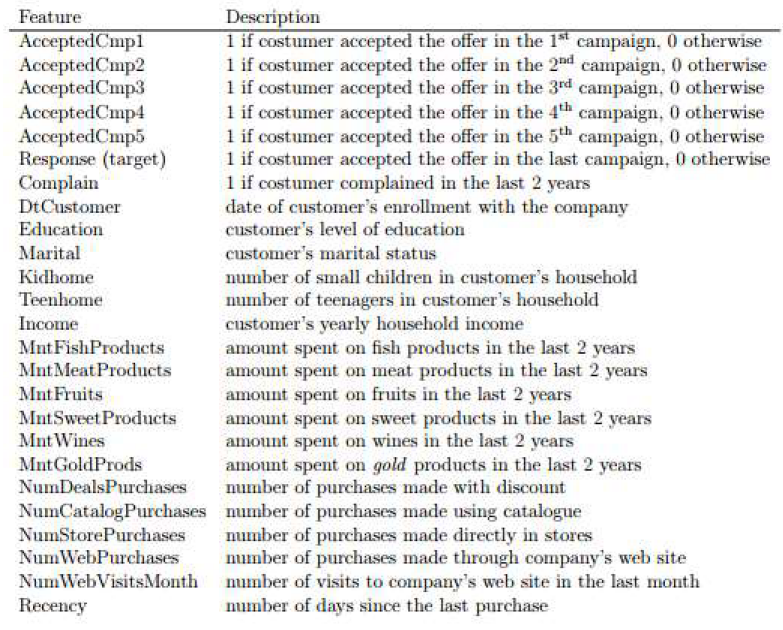
</div>

 (*) Firmographics are descriptive attributes of firms that can be used to aggregate individual firms into meaningful market segments. They describe businesses, non-profits, and governmental entities. Essentially, firmographics are to businesses and organizations what demographics are to people.


# Part 1) Data Exploration and Data cleaning

### Aim: provide the  marketing  team  a  better  understanding  of  the  characteristic  features  of respondents

#### These steps are the ones that take  the most time in a data science project!


<div class="alert alert-block alert-info">

### Set-up 
</div>

In [61]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from scipy import stats
""" 

#import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from collections import Counter
"""



' \n\nimport statsmodels.api as sm\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.preprocessing import KBinsDiscretizer\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.ensemble import IsolationForest\nfrom sklearn.cluster import KMeans\nfrom sklearn.cluster import AgglomerativeClustering\nfrom sklearn.tree import DecisionTreeClassifier\nfrom scipy.cluster.hierarchy import dendrogram, linkage\nfrom sklearn.decomposition import PCA\nfrom xgboost import XGBClassifier\nfrom collections import Counter\n'

In [351]:
# Loading database
df = pd.read_excel("ml_project1_data.xlsx")

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [34]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')



<div class="alert alert-block alert-info">


### 1) Data cleaning

</div>



#### Tidy data

 - column names are values, not names, e.g. <15-25, >26-45
 - multiple variables are stored in one column, e.g. m1534 (male of 15-34 years’ old age)
 - variables are stored in both rows and columns, e.g. tmax, tmin in the same column
 - multiple types of observational units are stored in the same table. e.g, song dataset and rank dataset in the same table
    - *a single observational unit is stored in multiple tables (can be combined)


All items OK.

#### Null columns

No null columns found 


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null category
Marital_Status         2240 non-null category
Income                 2216 non-null float64
Kidhome                2240 non-null category
Teenhome               2240 non-null category
Dt_Customer            2240 non-null datetime64[ns]
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCm


#### Unique constraints
a ﬁeld must be unique across a dataset: a same person must have a unique SS number.

--> Check Customer  ID number:

In [36]:
df['ID'].unique

<bound method Series.unique of 0        5524
1        2174
2        4141
3        6182
4        5324
        ...  
2235    10870
2236     4001
2237     7270
2238     8235
2239     9405
Name: ID, Length: 2240, dtype: int64>

In [15]:
df.shape

(2240, 29)

Since Nbr lines = Nbr unique Id numbers, there is no repeated ID.
Topic OK.

### Data types

In [63]:
# Variable types

df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### Missing values

In [157]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [158]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [161]:
df_null = df[df.isnull().any(axis=1)]
df_null

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
# We are going to treat missing values later

In [70]:

# Receives a dataframe and returns a table with missing values count, according to an informed threshold.
def missing_data(dframe, proportion_threshold):
    #proportion_threshold: maximum  percentage accepted as missing data 
    miss = dframe.isna().sum()
    miss = miss[miss>0]
    miss_p = miss/dframe.shape[0]
    miss_t = miss_p> float(proportion_threshold)
    str_threshold=str(float(proportion_threshold)*100)+'%'

    return pd.DataFrame({"Missings" : miss, "Proportion of Missings" : miss_p, "Higher than %s" %str_threshold : miss_t})


missing_data(df,0.02)

,Missings,Proportion of Missings,Higher than 2.0%
Income,24,0.010714,False


####  Check the given information:" The success rate of the campaign was 15%"


In [69]:
# We could also check as :
resp_yes=df["Response"].sum()   

#Sucess rate:
resp_yes/df.shape[0]


0.14910714285714285

In [26]:
#The average response rate is almost 15%.  OK.

df["Response"].describe() # Close to 15%

count    2240.000000
mean        0.149107
std         0.356274
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64

### 1.2 ) Analysis of categorical  features

In [64]:
# List of categorical features:

cat_features =  ["Education", "Marital_Status", "Kidhome", "Teenhome", "AcceptedCmp1", "AcceptedCmp2",
                 "AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5","Complain"]

# List of numeric features:

nbr_features = ['Year_Birth', 'Income', 
                'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'Z_CostContact', 'Z_Revenue']

""" 
nbr_features = ['Year_Birth', 'Income', 'Kidhome',
                   'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                   'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue']
"""

features= cat_features + nbr_features

## Target or Label variable : variable  we want to predict
## Column  " Response"  = Customers that purchase in 6th marketing campaign, after AcceptedCmp5 )
#target= df['Response']

In [46]:
train_data.shape

(2240, 29)

In [45]:
df.shape

(2240, 29)

### 1.2.1)   Categorical features analysis

In [191]:
""""
Unique values from categorical values
"""
# for col in cat_features:
#     print(str(col))
#     print(df[col].unique())
#     print('-------')

for c in range (0, len(cat_features)):
    print(str(cat_features[c]))
    print(df[cat_features[c]].unique())
    print('-------')


Education
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
-------
Marital_Status
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
-------
Kidhome
[0 1 2]
-------
Teenhome
[0 1 2]
-------
AcceptedCmp1
[0 1]
-------
AcceptedCmp2
[0 1]
-------
AcceptedCmp3
[0 1]
-------
AcceptedCmp4
[0 1]
-------
AcceptedCmp5
[0 1]
-------
Complain
[0 1]
-------
NumberOff


KeyError: 'NumberOff'

#### Overview of Positive Responses according to category feature

In [246]:
df_positive= df[df['Response']==1]
df_positive.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,3,11,1
33,7373,1952,PhD,Divorced,46610.0,0,2,2012-10-29,8,96,...,6,0,0,0,0,0,0,3,11,1
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,6,1,0,0,0,0,0,3,11,1


In [657]:
def cat_count(df,i):
    res=df[[cat_features[i],'Response']].groupby([cat_features[i]]).agg({'Response' : ["count","sum"]})                                                                                                              
    prop= df[[cat_features[i],'Response']].groupby([cat_features[i]]).sum()  / df[[cat_features[i],'Response']].groupby([cat_features[i]]).count() 
    result = pd.concat([res, prop], axis=1,sort=False)
    result.columns = ['Nbr observations', 'Nbr Positive Responses (for 6th campaign)', 'Proportion positive responses from observations']                                                                                     
    return result


def cat_plot_count(df,i):
    x_cat=cat_features[i]
    order_df=list(df[cat_features[i]].unique())
    #order_dfpos=

    fig = plt.figure(figsize=(10,6))

    ax1 = fig.add_subplot(2,1,1) 
    sns.countplot(data = df, x = x_cat, ax = ax1, order=order_df)
    ax1.set_title('Number of observations of %s subclasses in datasetnswers' %x_cat)

    ax2 = fig.add_subplot(2,1,2) 
    sns.countplot(data = df_positive, x = x_cat, ax = ax2, order=order_df)
    ax2.set_title('Number of positive responses from category %s in observations' %x_cat)
    #plt.subplots_adjust(bottom=0.9, right=0.8, top=0.9)
    plt.subplots_adjust(hspace = 0.7)

In [658]:
"""
Reponses positive (for 6th campaign ) for category Education
"""
i=0
cat_count(df,i)


,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
Education,,,
2n Cycle,203,22,0.108374
Basic,54,2,0.037037
Graduation,1127,152,0.134871
Master,370,57,0.154054
PhD,486,101,0.207819


In [ ]:
# import itertools
# palette = itertools.cycle(sns.color_palette())
# c = next(palette)




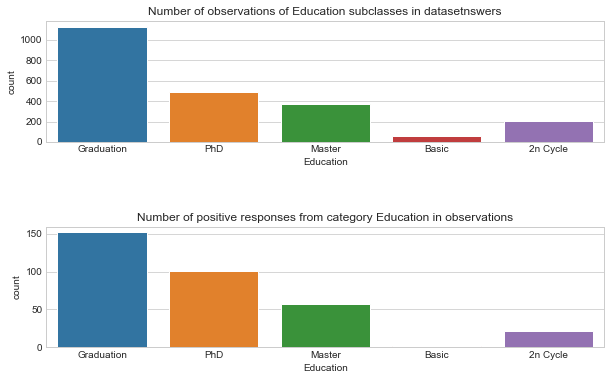

In [659]:
cat_plot_count(df,i)

In [660]:
"""

Reponses positive (for 6th campaign ) for category  "MArital Status"
"""
i=1
cat_count(df,i)


,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
Marital_Status,,,
Absurd,2,1,0.500000
Alone,3,1,0.333333
Divorced,232,48,0.206897
Married,864,98,0.113426
Single,480,106,0.220833
Together,580,60,0.103448
Widow,77,19,0.246753
YOLO,2,1,0.500000


In [323]:
list(df[cat_features[i]].unique())

['Single',
 'Together',
 'Married',
 'Divorced',
 'Widow',
 'Alone',
 'Absurd',
 'YOLO']

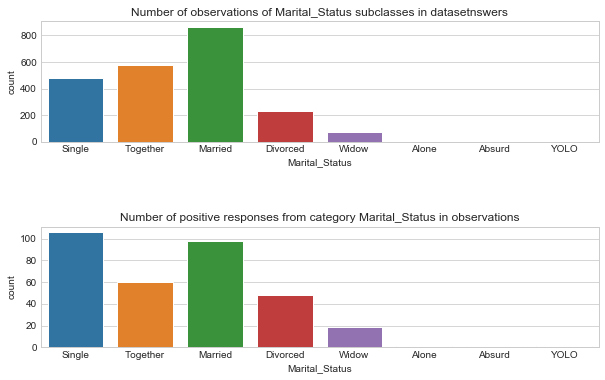

In [661]:
cat_plot_count(df,i)


In [662]:
"""

Reponses positive (for 6th campaign ) for category  
"""
i=2
cat_count(df,i)



,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
Kidhome,,,
0,1293,222,0.171694
1,899,110,0.122358
2,48,2,0.041667


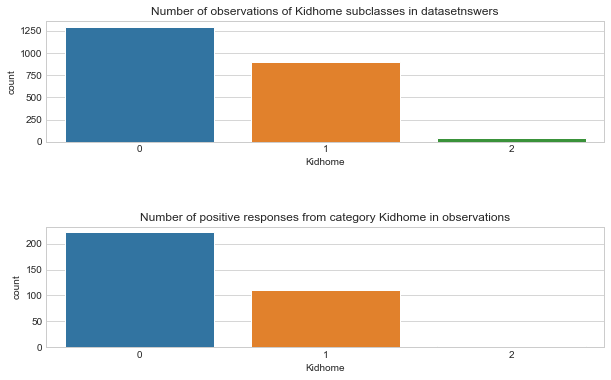

In [663]:
cat_plot_count(df,i)


In [665]:
"""

Reponses positive (for 6th campaign ) for category  'Teenhome'
"""
i=3

cat_count(df,i)




,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
Teenhome,,,
0,1158,237,0.204663
1,1030,92,0.089320
2,52,5,0.096154


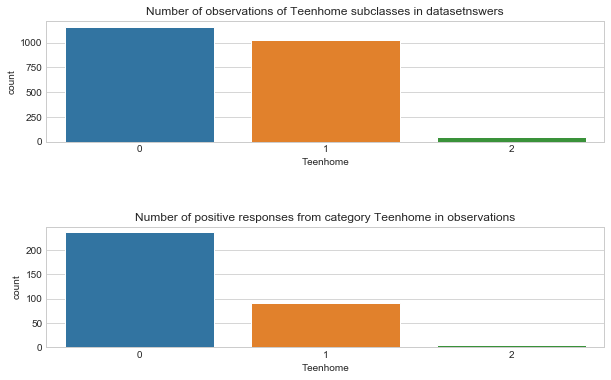

In [666]:
cat_plot_count(df,i)

In [335]:
"""

Reponses positive (for 6th campaign ) for category  
"""
i=4
cat_count(df,i)


,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
AcceptedCmp1,,,
0,2096,255,0.121660
1,144,79,0.548611


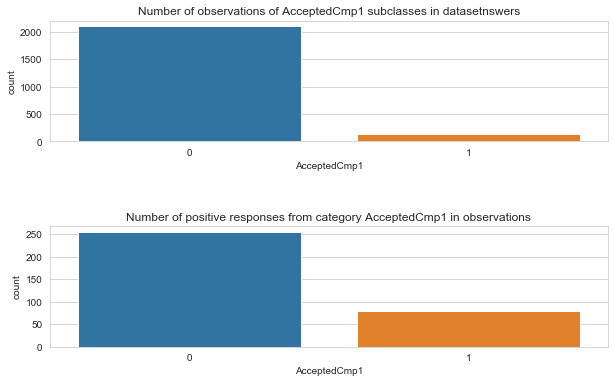

In [336]:
cat_plot_count(df,i)

In [338]:
"""

Reponses positive (for 6th campaign ) for category  
"""
i=5
cat_count(df,i)

,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
AcceptedCmp2,,,
0,2210,314,0.142081
1,30,20,0.666667


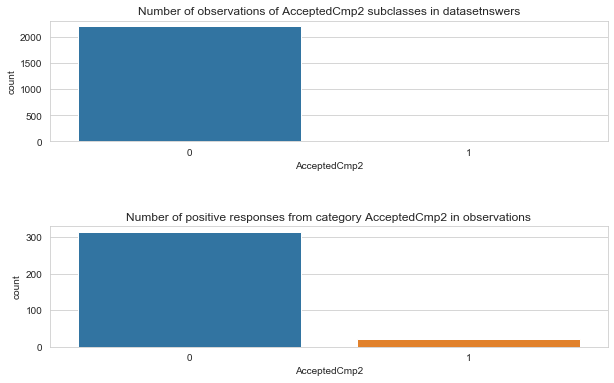

In [339]:
cat_plot_count(df,i)

In [340]:
"""

Reponses positive (for 6th campaign ) for category  
"""
i=6
cat_count(df,i)


,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
AcceptedCmp3,,,
0,2077,257,0.123736
1,163,77,0.472393


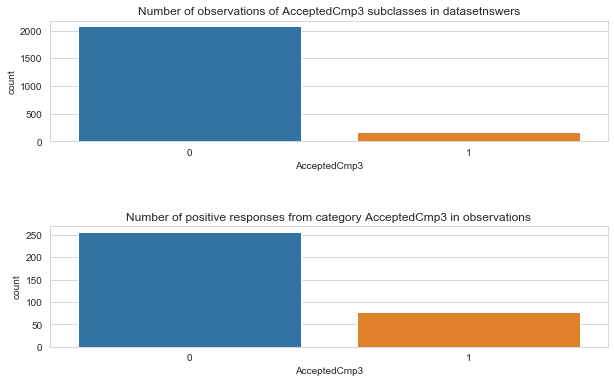

In [341]:
cat_plot_count(df,i)

In [342]:
"""

Reponses positive (for 6th campaign ) for category  
"""
i=7
cat_count(df,i)


,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
AcceptedCmp4,,,
0,2073,272,0.131211
1,167,62,0.371257


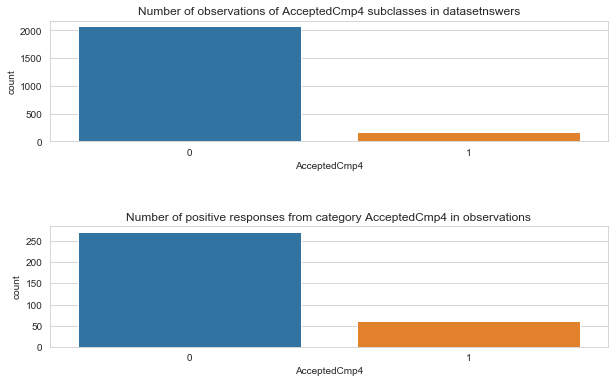

In [343]:
cat_plot_count(df,i)

In [344]:
"""
Positive Responses  (for 6th campaign ) for category  
"""
i=8
cat_count(df,i)

,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
AcceptedCmp5,,,
0,2077,242,0.116514
1,163,92,0.564417


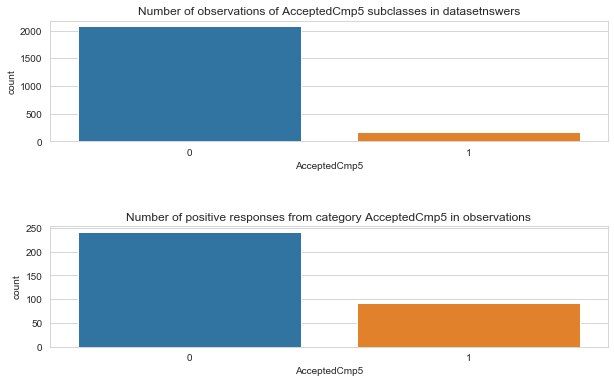

In [345]:
cat_plot_count(df,i)

In [346]:
"""

Reponses positive (for 6th campaign ) for category  
"""
i=9
cat_count(df,i)

,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
Complain,,,
0,2219,331,0.149166
1,21,3,0.142857


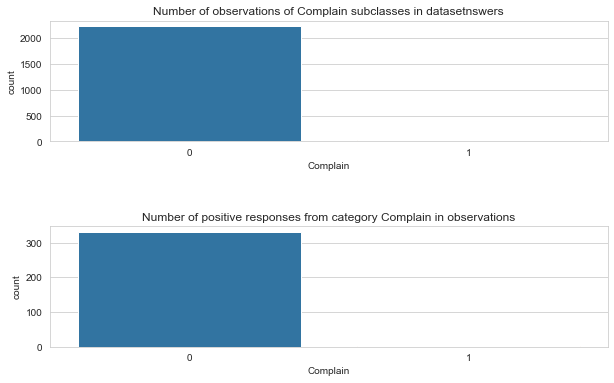

In [347]:
# complains do not seem to be a good variable
cat_plot_count(df,i)

"""
#####  Reducing Bias in Machine Learning

"""

In [78]:
"""
 Complete Descriptive Stats table of categorial features

**  Parameters:
dframe: dataframe, 
fc: list of categorical features, 
target:  target variable name,
n:  number of minimum observations to be taken into account 
threshold: threshold of discrimination ability 

** Returns a table with descriptive stats about  categorical features.
"""

def cat_feat_describe(dframe, fc, target, n, thresh):

    fl = []
    if (type(fc)==list):
        for feature in fc:
            fl.append(dframe.groupby([feature]).agg({target : ["count", "mean"]}))    
            fm = pd.concat(fl, keys=fc)
            fm = pd.DataFrame({"Number of observations" : fm.iloc[:,0],
                               
                               "Discrimination ability" : fm.iloc[:,1],
                                 "More than n observations" : fm.iloc[:,0]>n,
                                 "Higher discrimination ability than the Threshold" : fm.iloc[:,1]>thresh,
                                 "Both True" : ((fm.iloc[:,0]>n) & (fm.iloc[:,1]>thresh))})
    else:
        fm = (df.groupby(fc).agg({target : ["count", "mean"]}))
        fm = pd.DataFrame({"Number of observations" : fm.iloc[:,0], 
                           "Discrimination ability" : fm.iloc[:,1],
                                 "More than n observations" : fm.iloc[:,0]>n,
                                 "Higher discrimination ability than the Threshold" : fm.iloc[:,1]>thresh,
                                 "Both True" : ((fm.iloc[:,0]>n) & (fm.iloc[:,1]>thresh))})
        
    return fm


cat_feat_statdesc = cat_feat_describe(df, cat_features, "Response", 40, 0.15)
cat_feat_statdesc

Number of observations  Discrimination ability  \
Education      2n Cycle                       203                0.108374   
               Basic                           54                0.037037   
               Graduation                    1127                0.134871   
               Master                         370                0.154054   
               PhD                            486                0.207819   
Marital_Status Absurd                           2                0.500000   
               Alone                            3                0.333333   
               Divorced                       232                0.206897   
               Married                        864                0.113426   
               Single                         480                0.220833   
               Together                       580                0.103448   
               Widow                           77                0.246753   
               YOLO                             2                0.500000   
Kidhome        0                             1293                0.171694   
               1                              899                0.122358   
               2                               48                0.041667   
Teenhome       0                             1158                0.204663   
               1                             1030                0.089320   
               2                               52                0.096154   
AcceptedCmp1   0                             2096                0.121660   
               1                              144                0.548611   
AcceptedCmp2   0                             2210                0.142081   
               1                               30                0.666667   
AcceptedCmp3   0                             2077                0.123736   
               1                              163                0.472393   
AcceptedCmp4   0                             2073                0.131211   
               1                              167                0.371257   
AcceptedCmp5   0                             2077                0.116514   
               1                              163                0.564417   
Complain       0                             2219                0.149166   
               1                               21                0.142857   

                           More than n observations  \
Education      2n Cycle                        True   
               Basic                           True   
               Graduation                      True   
               Master                          True   
               PhD                             True   
Marital_Status Absurd                         False   
               Alone                          False   
               Divorced                        True   
               Married                         True   
               Single                          True   
               Together                        True   
               Widow                           True   
               YOLO                           False   
Kidhome        0                               True   
               1                               True   
               2                               True   
Teenhome       0                               True   
               1                               True   
               2                               True   
AcceptedCmp1   0                               True   
               1                               True   
AcceptedCmp2   0                               True   
               1                              False   
AcceptedCmp3   0                               True   
               1                               True   
AcceptedCmp4   0                               True   
               1                               True   
AcceptedCmp5   0      

In [139]:
cat_feat_statdesc.to_excel("cat_feat_statdesc.xlsx")  

In [80]:
# Items from Classes where both decent number of observations and a discrimination ability higher than 15%

cat_feat_statdesc[cat_feat_statdesc["Both True"]]

Number of observations  Discrimination ability  \
Education      Master                       370                0.154054   
               PhD                          486                0.207819   
Marital_Status Divorced                     232                0.206897   
               Single                       480                0.220833   
               Widow                         77                0.246753   
Kidhome        0                           1293                0.171694   
Teenhome       0                           1158                0.204663   
AcceptedCmp1   1                            144                0.548611   
AcceptedCmp3   1                            163                0.472393   
AcceptedCmp4   1                            167                0.371257   
AcceptedCmp5   1                            163                0.564417   

                         More than n observations  \
Education      Master                        True   
               PhD                           True   
Marital_Status Divorced                      True   
               Single                        True   
               Widow                         True   
Kidhome        0                             True   
Teenhome       0                             True   
AcceptedCmp1   1                             True   
AcceptedCmp3   1                             True   
AcceptedCmp4   1                             True   
AcceptedCmp5   1                             True   

                         Higher discrimination ability than the Threshold  \
Education      Master                                                True   
               PhD                                                   True   
Marital_Status Divorced                                              True   
               Single                                                True   
               Widow                                                 True   
Kidhome        0                                                     True   
Teenhome       0                                                     True   
AcceptedCmp1   1                                                     True   
AcceptedCmp3   1                                                     True   
AcceptedCmp4   1                                                     True   
AcceptedCmp5   1                                                     True   

                         Both True  
Education      Master         True  
               PhD            True  
Marital_Status Divorced       True  
               Single         True  
               Widow          True  
Kidhome        0              True  
Teenhome       0              True  
AcceptedCmp1   1              True  
AcceptedCmp3   1              True  
AcceptedCmp4   1              True  
AcceptedCmp5   1              True

In [90]:
"""
Items from classes with few observations (data lines)
# Show "False" observations
"""

cat_feat_statdesc[-cat_feat_statdesc["More than n observations"]]

Number of observations  Discrimination ability  \
Marital_Status Absurd                       2                0.500000   
               Alone                        3                0.333333   
               YOLO                         2                0.500000   
AcceptedCmp2   1                           30                0.666667   
Complain       1                           21                0.142857   

                       More than n observations  \
Marital_Status Absurd                     False   
               Alone                      False   
               YOLO                       False   
AcceptedCmp2   1                          False   
Complain       1                          False   

                       Higher discrimination ability than the Threshold  \
Marital_Status Absurd                                              True   
               Alone                                               True   
               YOLO                                                True   
AcceptedCmp2   1                                                   True   
Complain       1                                                  False   

                       Both True  
Marital_Status Absurd      False  
               Alone       False  
               YOLO        False  
AcceptedCmp2   1           False  
Complain       1           False

In [466]:
### YOLO is an acronym for “You only live once"... not an official marital status...

"""
Observations:
Categorial variable Marital_Status : Absurd, Alone and  YOLO contains very few observations.
Moreover, they are not common marital status.
We are going to remove these observations 

"""

'\nObservations:\nCategorial variable Marital_Status : Absurd, Alone and  YOLO contains very few observations.\nMoreover, they are not common marital status.\nWe are going to remove these observations \n\n'




#### Adjustments on dataset for categorical variables

##### 1st: make a copy of original dataframe

In [444]:
df2= df.copy()


In [445]:
# Get names of indexes for which column "Marital Status" =  ["Absurd", "Alone", "YOLO"]
df2=df2[df2['Marital_Status'] != 'Absurd']
df2=df2[df2['Marital_Status'] != 'Alone']
df2=df2[df2['Marital_Status'] != 'YOLO']
df2.shape

(2233, 29)

###  1.3 Analysis of Numerical Variables 





In [446]:
"""
#### 1.3.1)  Dealing with Date types 

"""

####  Checking data columns  
print (df2['Dt_Customer' ][0])
type (df2['Dt_Customer' ][0])


2012-09-04


str

In [415]:
datetime.today()

datetime.datetime(2020, 4, 22, 21, 32, 36, 59236)

In [447]:
###### Transform column  "Dt_Customer"  into days since registration

def days_since(dates_series, date_format):
    n = len(dates_series)
    result = [0] * n
    for i in range(n):
        result[i] = (datetime.today()-datetime.strptime(dates_series[i], date_format)).days
    return result

df2["Days_Customer"] = days_since(list(df2.Dt_Customer), "%Y-%m-%d")

df2= df2.drop(columns="Dt_Customer")

df2["Days_Customer"].head()

0    2787
1    2237
2    2436
3    2263
4    2285
Name: Days_Customer, dtype: int64

In [448]:
df2.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Days_Customer            int64
dtype: object

In [449]:
#### Statistical description of Numerical variables
# including Response(target)

feat_num = list(df2.columns)

feat_num = list(filter(lambda x: x not in cat_features, feat_num))

feat_num.remove("ID") # Removing ID, since it is not relevant in this analysis of numerical variables


df2[feat_num].describe() # Describing only Numerical Variables

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Response,Days_Customer
count,2233.000000,2209.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.00000,2233.000000,2233.0,2233.0,2233.000000,2233.000000
mean,1968.790864,52243.977818,49.172414,304.033587,26.300940,167.113300,37.445141,27.108374,43.903269,2.321093,4.081505,2.661890,5.79176,5.316167,3.0,11.0,0.148231,2477.557546
std,11.979248,25198.475858,28.962114,336.953019,39.779532,225.870588,54.461569,41.321700,52.009602,1.932181,2.776886,2.921749,3.25473,2.425668,0.0,0.0,0.355408,201.971642
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000,2124.000000
25%,1959.000000,35246.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.00000,3.000000,3.0,11.0,0.000000,2305.000000
50%,1970.000000,51390.000000,50.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.00000,6.000000,3.0,11.0,0.000000,2479.000000
75%,1977.000000,68627.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.00000,7.000000,3.0,11.0,0.000000,2652.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.00000,20.000000,3.0,11.0,1.000000,2823.000000


In [450]:
"""
1.3.2 Variables with zero variance (constants)
""" 

std = df2[feat_num].describe().iloc[2,:]

const_var = [std[std<0.05].index[0], std[std<0.05].index[1]]

std[std<0.05]

Z_CostContact    0.0
Z_Revenue        0.0
Name: std, dtype: float64

In [451]:
## Removing constant variables

df2.drop(labels=const_var, axis=1, inplace=True) # Now data_ does not contain zero variance variables.

# Removing the names of the no varaiance variables from the list of numerical features.
feat_num = list(filter(lambda x: x not in const_var, feat_num)) 

In [452]:
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,4,7,0,0,0,0,0,0,1,2787
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,5,0,0,0,0,0,0,0,2237
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,10,4,0,0,0,0,0,0,0,2436
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,4,6,0,0,0,0,0,0,0,2263
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,6,5,0,0,0,0,0,0,0,2285


In [453]:
feat_num

['Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Response',
 'Days_Customer']

In [ ]:
""" 
1.3.3 Inputing Missing Values

Instead of a simple mean inputation, we employ the Linear Regression model from sklearn package 
to perform a prediction of what the missing values in Income would be considering all the other variables
and use it to input the missing values.
"""

In [454]:
df2.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Days_Customer           0
dtype: int64

In [455]:
# Only the feature Income contains missing variables

# Preparing all datasets to be used in the Linear Regression Model

from sklearn.linear_model import LinearRegression

X = df2
y = X["Income"]
y = y[-y.isna()]
X = X.drop(columns=["ID"])

X["Marital_Status"] = pd.Categorical(X["Marital_Status"])
X["Marital_Status"] = X["Marital_Status"].cat.codes

X["Education"] = pd.Categorical(X["Education"])
X["Education"] = X["Education"].cat.codes

x_pred = X[X.Income.isna()]
x_pred = x_pred.drop(columns="Income")

X = X[-X.Income.isna()]
X = X.drop(columns="Income")


# Linear Regression Model
reg = LinearRegression().fit(X, y)

# Predictions
y_pred = reg.predict(x_pred)

# Store the predictions in the missing values
df2.loc[df2.Income.isna(), "Income"] = y_pred

In [456]:
missing_data(df2,0.01) # No more missings!

,Missings,Proportion of Missings,Higher than 1.0%


In [457]:
"""
# Checking other date variables
# YEar_birth.
""" 
df2["Year_Birth"].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940], dtype=int64)

In [474]:
df["Year_Birth"].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [476]:
col="Year_Birth"
res=df[[col,'Response']].groupby([col]).agg({'Response' : ["count","sum"]})                                                                                                              
prop= df[[col,'Response']].groupby([col]).sum()  / df[[col,'Response']].groupby([col]).count() 
result = pd.concat([res, prop], axis=1,sort=False)
result.columns = ['Nbr observations', 'Nbr Positive Responses (for 6th campaign)', 'Proportion positive responses from observations']
result

,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
Year_Birth,,,
1893,1,0,0.000000
1899,1,0,0.000000
1900,1,0,0.000000
1940,1,0,0.000000
1941,1,0,0.000000
1943,7,3,0.428571
1944,7,1,0.142857
1945,8,2,0.250000
1946,16,3,0.187500


In [477]:
df2=df2[df2["Year_Birth"] > 1941]   # remove data that do not make sense

In [478]:
df2["Year_Birth"].astype('int')

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2228, dtype: int32

In [410]:
"""

### CHANGE

# The same was done to Year_birth since they were inconsistent.

data_[(2019 - data_["Year_Birth"])>=90]


# Preparing all datasets to be used in the Linear Regression Model

from sklearn.linear_model import LinearRegression

X = df2
y = X[(2019 - X["Year_Birth"])<90].Year_Birth
X = X.drop(columns=["ID"])

X["Marital_Status"] = pd.Categorical(X["Marital_Status"])
X["Marital_Status"] = X["Marital_Status"].cat.codes

X["Education"] = pd.Categorical(X["Education"])
X["Education"] = X["Education"].cat.codes

x_pred = X[(2019 - X["Year_Birth"])>=90]
x_pred = x_pred.drop(columns="Year_Birth")

X = X[(2019 - X["Year_Birth"])<90]
X = X.drop(columns="Year_Birth")



# Linear Regression Model
reg = LinearRegression().fit(X, y)

# Predictions
y_pred = reg.predict(x_pred)

# Store the predictions in the missing values
data_.loc[(2019 - data_["Year_Birth"])>=90, "Year_Birth"] = y_pred.round()
data_["Year_Birth"].astype('int')

"""

'\n\n### CHANGE\n\n# The same was done to Year_birth since they were inconsistent.\n\ndata_[(2019 - data_["Year_Birth"])>=90]\n\n\n# Preparing all datasets to be used in the Linear Regression Model\n\nfrom sklearn.linear_model import LinearRegression\n\nX = df2\ny = X[(2019 - X["Year_Birth"])<90].Year_Birth\nX = X.drop(columns=["ID"])\n\nX["Marital_Status"] = pd.Categorical(X["Marital_Status"])\nX["Marital_Status"] = X["Marital_Status"].cat.codes\n\nX["Education"] = pd.Categorical(X["Education"])\nX["Education"] = X["Education"].cat.codes\n\nx_pred = X[(2019 - X["Year_Birth"])>=90]\nx_pred = x_pred.drop(columns="Year_Birth")\n\nX = X[(2019 - X["Year_Birth"])<90]\nX = X.drop(columns="Year_Birth")\n\n\n\n# Linear Regression Model\nreg = LinearRegression().fit(X, y)\n\n# Predictions\ny_pred = reg.predict(x_pred)\n\n# Store the predictions in the missing values\ndata_.loc[(2019 - data_["Year_Birth"])>=90, "Year_Birth"] = y_pred.round()\ndata_["Year_Birth"].astype(\'int\')\n\n'

In [480]:
""" 
1.3.4 Correlation Matrix between numerical variables
We employ the correlation matrix here in order to find variables 
that show high correlation between them so we could eliminate one or join them.

"""

# The function to "zoom" in the correlation matrix.
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])]


# Takes a dataframe and returns the correlation matrix while plotting the correlation matrix plot using hues of blue and red.
def correlation_matrix(dframe):
    # Compute the correlation matrix
    corr = dframe.corr()
    cmap = sns.diverging_palette(5, 250, as_cmap=True)
    vis = corr.style.background_gradient(cmap, axis=1)\
            .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
            .set_caption("Hover to magify")\
            .set_precision(2)\
            .set_table_styles(magnify())
    return vis


In [479]:
feat_num_only = feat_num.copy()

feat_num_only.remove("Response") # Only features here, no target variable

correlation_matrix(df2[feat_num_only])

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Customer
Year_Birth,1,-0.16,-0.016,-0.16,-0.015,-0.028,-0.045,-0.022,-0.062,-0.07,-0.15,-0.13,-0.14,0.12,0.017
Income,-0.16,1,-0.0037,0.58,0.43,0.58,0.44,0.44,0.33,-0.082,0.39,0.59,0.53,-0.55,-0.019
Recency,-0.016,-0.0037,1,0.015,-0.0048,0.022,0.00025,0.023,0.017,0.0027,-0.0095,0.023,0.0011,-0.019,0.025
MntWines,-0.16,0.58,0.015,1,0.39,0.56,0.4,0.39,0.39,0.012,0.54,0.63,0.64,-0.32,0.16
MntFruits,-0.015,0.43,-0.0048,0.39,1,0.54,0.59,0.57,0.39,-0.13,0.3,0.49,0.46,-0.42,0.067
MntMeatProducts,-0.028,0.58,0.022,0.56,0.54,1,0.57,0.53,0.35,-0.12,0.29,0.72,0.48,-0.54,0.093
MntFishProducts,-0.045,0.44,0.00025,0.4,0.59,0.57,1,0.58,0.42,-0.14,0.3,0.53,0.46,-0.44,0.081
MntSweetProducts,-0.022,0.44,0.023,0.39,0.57,0.53,0.58,1,0.37,-0.12,0.35,0.49,0.45,-0.42,0.081
MntGoldProds,-0.062,0.33,0.017,0.39,0.39,0.35,0.42,0.37,1,0.051,0.43,0.44,0.38,-0.25,0.16
NumDealsPurchases,-0.07,-0.082,0.0027,0.012,-0.13,-0.12,-0.14,-0.12,0.051,1,0.23,-0.0056,0.068,0.35,0.22


In [481]:
# Function to find the maximum value in a correlation matrix 

def max_corr_matrix(matrix):
    aux = 0
    line = ""
    col = ""
    for l in matrix:
        for i in matrix:
            if ((matrix[l][i]<1) & (abs(matrix[l][i])>abs(aux))):
                aux = matrix[l][i]
                line = l
                col = i
    print("Max Value:", aux,
          "\nLine:", line,
          "\nColumn:", col)
    return aux

max_corr_matrix(df2[feat_num2].corr())

Max Value: 0.7236661070408117 
Line: MntMeatProducts 
Column: NumCatalogPurchases


0.7236661070408117

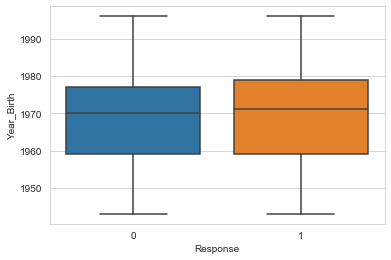

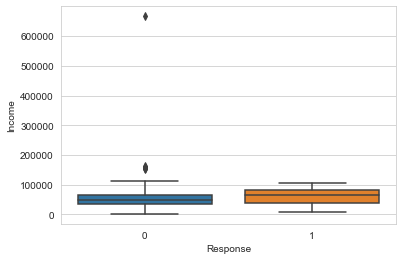

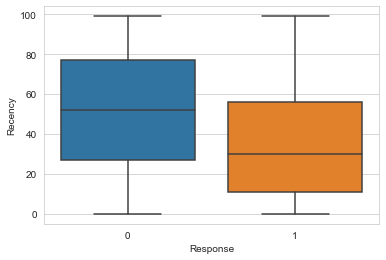

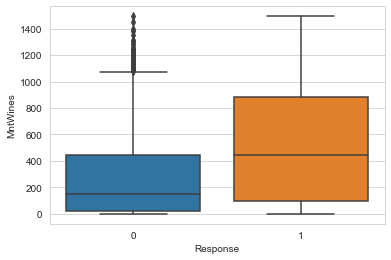

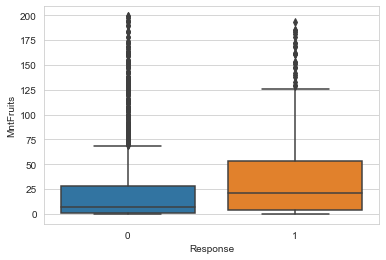

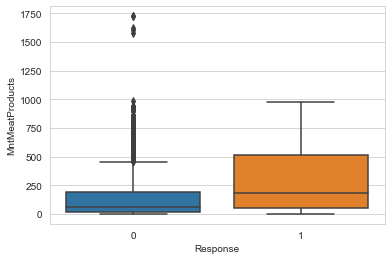

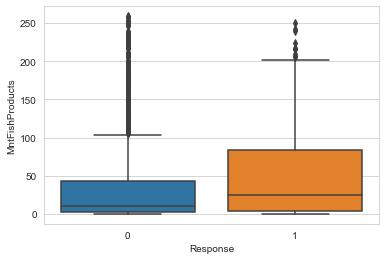

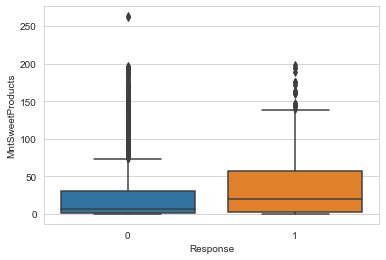

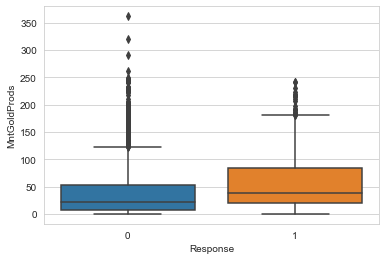

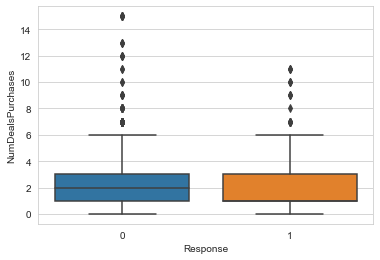

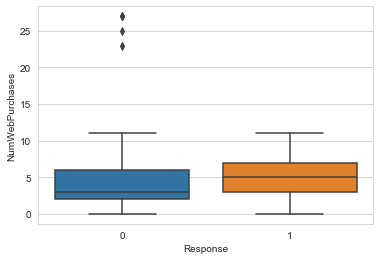

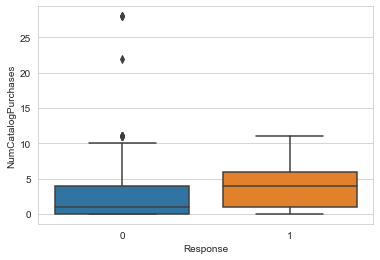

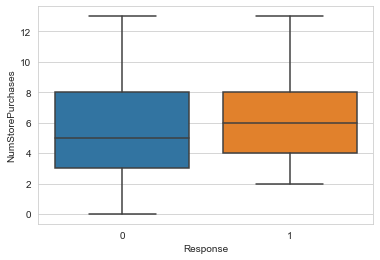

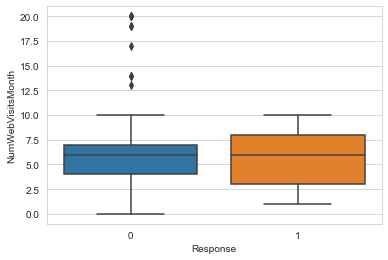

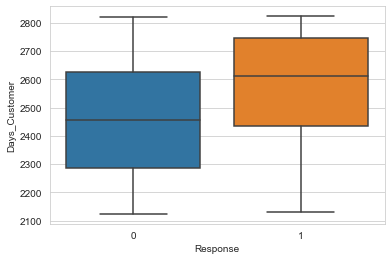

In [482]:
"""
The highest correlation, 0,72,  we have is between variables
  Meat Producst purchased
  number of Catalog Purchases 
  
Normally we should discard one of these, since they are highly correlated.
First, let's see the boxplot plots for the numerical variables
"""



"""
Visualization of Numerical Variables Stats as Boxplots 

"""



def num_feat_plot(dframe, feat_nlist, target, feat_clist = None):
    
    if(target in feat_nlist):
        feat_nl = feat_nlist.copy()
        feat_nl.remove(target)
        
    if (feat_clist==None):
        
        if (type(feat_nl)==str):
            sns.boxplot(data = dframe, y = feat_nl, x = target)
            plt.show()        
        else:
            for feat in feat_nl:
                sns.boxplot(data = dframe, y = feat, x = target)
                plt.show()
        
    else:
        if (type(feat_nl)==str):
            sns.boxplot(data = df2, y = feat_nl, x = feat_clist, hue = target)
            plt.show()      
        else:
            for feat in feat_nl:
                sns.boxplot(data = df2, y = feat, x = feat_clist, hue = target)
                plt.show()   
    return

num_feat_plot(df2, feat_num2, "Response")   ##########

In [468]:
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Days_Customer'],
      dtype='object')


According to boxplots of numerical variables, we can see there are outliers (mainly upper outiers):
- Income holds many high outliers

- Amount spent in products
 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',

- Market places variables: 
  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumWebVisitsMonth',
  
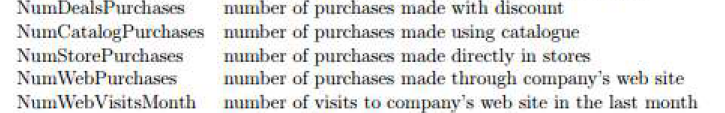

 - 'NumStorePurchases' do not have outliers

- Year_Birth do not hold outliers,  probabily because we already removed the subcalsses that contains only 1 observation. 
       
"""


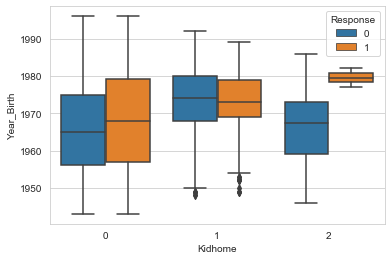

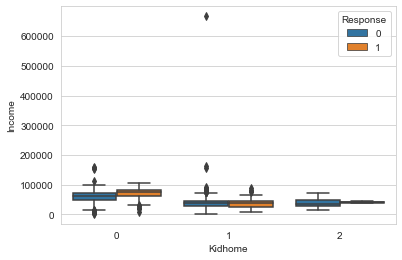

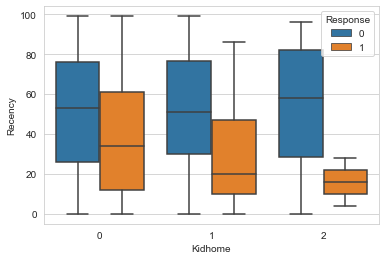

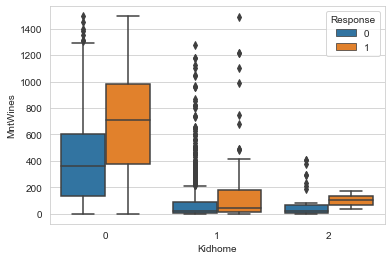

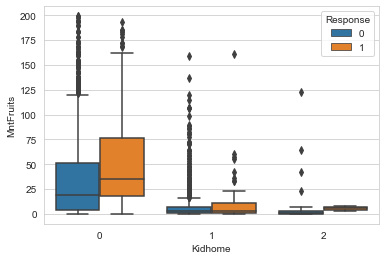

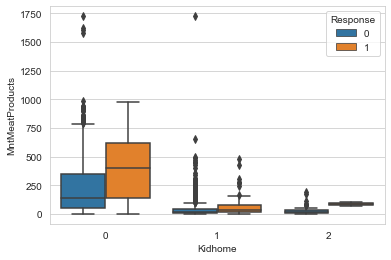

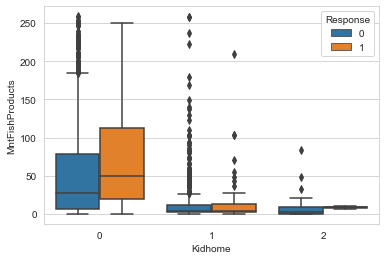

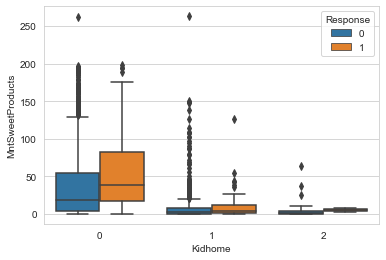

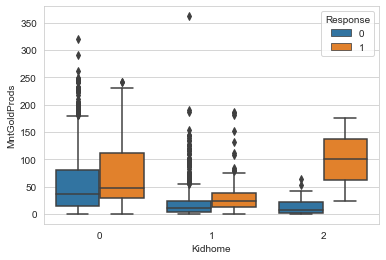

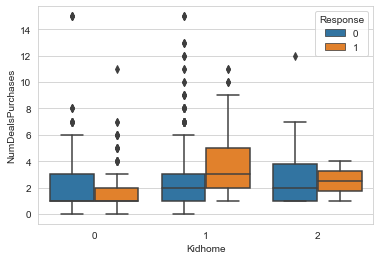

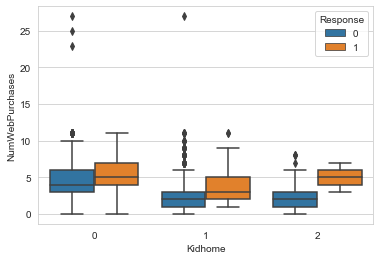

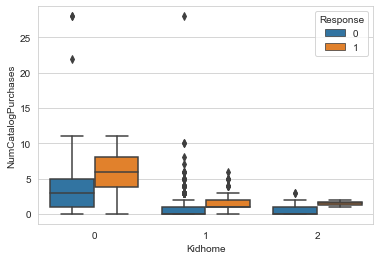

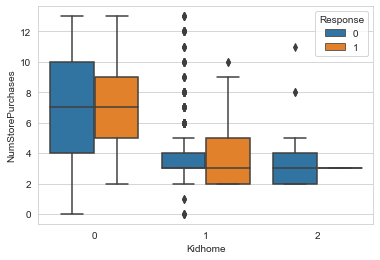

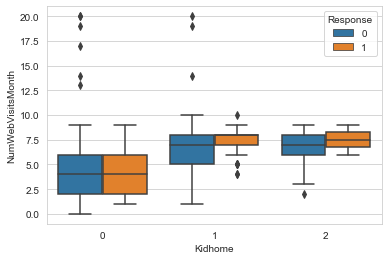

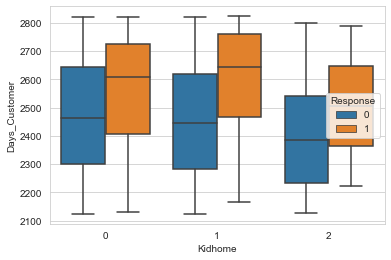

In [485]:
num_feat_plot(df2, feat_num2, "Response", "Kidhome")

In [494]:
feat_num

['Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Days_Customer']

In [503]:
"""

1.4 Outlier Detection and removal


1.4.1) Straightforward outlier removal, without knowing gthe values

For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
all(axis=1) ensures that for each row, all column satisfy the constraint.
Finally, result of this condition is used to index the dataframe.

"""

from scipy import stats
import numpy as np


df3= df2.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2239
Data columns (total 27 columns):
ID                     2228 non-null int64
Year_Birth             2228 non-null int64
Education              2228 non-null object
Marital_Status         2228 non-null object
Income                 2228 non-null float64
Kidhome                2228 non-null int64
Teenhome               2228 non-null int64
Recency                2228 non-null int64
MntWines               2228 non-null int64
MntFruits              2228 non-null int64
MntMeatProducts        2228 non-null int64
MntFishProducts        2228 non-null int64
MntSweetProducts       2228 non-null int64
MntGoldProds           2228 non-null int64
NumDealsPurchases      2228 non-null int64
NumWebPurchases        2228 non-null int64
NumCatalogPurchases    2228 non-null int64
NumStorePurchases      2228 non-null int64
NumWebVisitsMonth      2228 non-null int64
AcceptedCmp3           2228 non-null int64
AcceptedCmp4           2228 n

In [507]:
df3.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239],
           dtype='int64', length=2228)

In [508]:
feat_num

['Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Days_Customer']

In [521]:
"""
# Function do  accept a dataframe, remove outliers, return cleaned data in a new dataframe
# eliminates data above 3 standard deviations
"""

def remove_outlier(df_in, col_list):
    for i in range (0, len(col_list)):
        col_name=col_list[i]
        if i==0:
            q1 = df_in[col_name].quantile(0.25)
            q3 = df_in[col_name].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            fence_low  = q1-1.5*iqr
            fence_high = q3+1.5*iqr
            df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
        else:
            q1 = df_out[col_name].quantile(0.25)
            q3 = df_out[col_name].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            fence_low  = q1-1.5*iqr
            fence_high = q3+1.5*iqr
            df_out = df_out.loc[(df_out[col_name] > fence_low) & (df_out[col_name] < fence_high)]
            
    return df_out



In [522]:
df3.shape

(2228, 27)

In [619]:
df4=remove_outlier(df3, feat_num)
df4.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Customer
1,2174,1954,Graduation,Single,46344.000000,1,1,38,11,1,...,2,5,0,0,0,0,0,0,0,2237
3,6182,1984,Graduation,Together,26646.000000,1,0,26,11,4,...,4,6,0,0,0,0,0,0,0,2263
7,6177,1985,PhD,Married,33454.000000,1,0,32,76,10,...,4,8,0,0,0,0,0,0,0,2541
8,4855,1974,PhD,Together,30351.000000,1,0,19,14,0,...,2,9,0,0,0,0,0,0,1,2512
10,1994,1983,Graduation,Married,30354.292851,1,0,11,5,5,...,2,7,0,0,0,0,0,0,0,2350


In [620]:
df4.shape

(932, 27)

In [621]:
"""
An other approach for outliers detections and elimination
1.4.2 Outliers detection -  Univariate Outliers
Standard Deviation Cutoffs
First we will use the Standard Deviation to find univariate outliers in numerical features. Every observation above 3 standard deviations of its own distribution will be considered an outlier.

"""

# Function that is given a series and returns a list of same size indicating with boolean the outliers.
# 3 Standard Deviations is the default cutoff.

def filter_by_std(series_, n_stdev=3.0, return_thresholds=False):
    mean_, stdev_ = series_.mean(), series_.std()
    cutoff = stdev_ * n_stdev
    lower_bound, upper_bound = mean_ - cutoff, mean_ + cutoff
    if return_thresholds:
        return lower_bound, upper_bound
    else:
        return [True if i < lower_bound or i > upper_bound else False for i in series_]

    
# Function that is given a series and returns a list of same size indicating with boolean the outliers.
# 1.5 Interquartile Range is the default cutoff.
def filter_by_iqr(series_, k=1.5, return_thresholds=False):
    q25, q75 = np.percentile(series_, 25), np.percentile(series_, 75)
    iqr = q75-q25
    
    cutoff = iqr*k
    lower_bound, upper_bound = q25-cutoff, q75+cutoff
    
    if return_thresholds:
        return lower_bound, upper_bound
    else:
        return [True if i < lower_bound or i > upper_bound else False for i in series_]

In [622]:
df4_2 = pd.DataFrame()

for feat in feat_num:
    df4_2  = outliers.append(df3[filter_by_std(df3[feat], n_stdev=3)])
    
df4_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 164 to 2214
Data columns (total 27 columns):
ID                     335 non-null int64
Year_Birth             335 non-null int64
Education              335 non-null object
Marital_Status         335 non-null object
Income                 335 non-null float64
Kidhome                335 non-null int64
Teenhome               335 non-null int64
Recency                335 non-null int64
MntWines               335 non-null int64
MntFruits              335 non-null int64
MntMeatProducts        335 non-null int64
MntFishProducts        335 non-null int64
MntSweetProducts       335 non-null int64
MntGoldProds           335 non-null int64
NumDealsPurchases      335 non-null int64
NumWebPurchases        335 non-null int64
NumCatalogPurchases    335 non-null int64
NumStorePurchases      335 non-null int64
NumWebVisitsMonth      335 non-null int64
AcceptedCmp3           335 non-null int64
AcceptedCmp4           335 non-null int64
Accept

In [ ]:
   ## We are going to pursue with df4.

In [623]:
df4['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [624]:
"""
Let's run again correlation matrix
"""

correlation_matrix(df4[feat_num_only])

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Customer
Year_Birth,1,-0.35,-0.026,-0.23,0.088,0.019,0.15,0.13,-0.0042,-0.077,-0.031,-0.13,-0.12,0.19,0.062
Income,-0.35,1,0.017,0.56,-0.097,0.32,-0.11,-0.091,0.028,-0.057,0.2,0.2,0.35,-0.37,-0.21
Recency,-0.026,0.017,1,-0.02,0.025,0.045,0.0057,0.039,0.019,0.022,0.00022,0.029,0.019,-0.033,0.0084
MntWines,-0.23,0.56,-0.02,1,0.04,0.52,-0.018,0.0036,0.26,0.3,0.64,0.48,0.6,-0.1,0.035
MntFruits,0.088,-0.097,0.025,0.04,1,0.34,0.43,0.55,0.41,0.13,0.3,0.22,0.26,0.052,0.17
MntMeatProducts,0.019,0.32,0.045,0.52,0.34,1,0.36,0.34,0.39,0.36,0.68,0.43,0.53,0.063,0.14
MntFishProducts,0.15,-0.11,0.0057,-0.018,0.43,0.36,1,0.44,0.35,0.11,0.25,0.2,0.21,0.012,0.16
MntSweetProducts,0.13,-0.091,0.039,0.0036,0.55,0.34,0.44,1,0.4,0.15,0.28,0.25,0.23,0.006,0.15
MntGoldProds,-0.0042,0.028,0.019,0.26,0.41,0.39,0.35,0.4,1,0.27,0.44,0.54,0.13,0.073,0.22
NumDealsPurchases,-0.077,-0.057,0.022,0.3,0.13,0.36,0.11,0.15,0.27,1,0.57,0.32,0.37,0.15,0.13


In [617]:
correlation_matrix(df2[feat_num_only])

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Customer
Year_Birth,1,-0.16,-0.016,-0.16,-0.015,-0.028,-0.045,-0.022,-0.062,-0.07,-0.15,-0.13,-0.14,0.12,0.017
Income,-0.16,1,-0.0037,0.58,0.43,0.58,0.44,0.44,0.33,-0.082,0.39,0.59,0.53,-0.55,-0.019
Recency,-0.016,-0.0037,1,0.015,-0.0048,0.022,0.00025,0.023,0.017,0.0027,-0.0095,0.023,0.0011,-0.019,0.025
MntWines,-0.16,0.58,0.015,1,0.39,0.56,0.4,0.39,0.39,0.012,0.54,0.63,0.64,-0.32,0.16
MntFruits,-0.015,0.43,-0.0048,0.39,1,0.54,0.59,0.57,0.39,-0.13,0.3,0.49,0.46,-0.42,0.067
MntMeatProducts,-0.028,0.58,0.022,0.56,0.54,1,0.57,0.53,0.35,-0.12,0.29,0.72,0.48,-0.54,0.093
MntFishProducts,-0.045,0.44,0.00025,0.4,0.59,0.57,1,0.58,0.42,-0.14,0.3,0.53,0.46,-0.44,0.081
MntSweetProducts,-0.022,0.44,0.023,0.39,0.57,0.53,0.58,1,0.37,-0.12,0.35,0.49,0.45,-0.42,0.081
MntGoldProds,-0.062,0.33,0.017,0.39,0.39,0.35,0.42,0.37,1,0.051,0.43,0.44,0.38,-0.25,0.16
NumDealsPurchases,-0.07,-0.082,0.0027,0.012,-0.13,-0.12,-0.14,-0.12,0.051,1,0.23,-0.0056,0.068,0.35,0.22



<div class="alert alert-block alert-info">


### 2) Ranking Value of Features  & Feature Engineering

Now , we  need to evaluate rank the value of features,  so we can compare them and check which ones are the most relevant to be set as an input to the predictive model. 

After we have one tool to measure the value, we can go ahead and create new features and compare them with the ones we already have.

</div>


In [628]:
df4.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Days_Customer'],
      dtype='object')

[5.04774441e-02 4.89815328e-02 2.19909527e-02 2.76768187e-02
 1.01968843e-01 4.59499123e-02 5.10267660e-02 6.12680666e-02
 4.36902241e-02 5.80088200e-02 6.57874247e-02 3.88213858e-02
 3.88050699e-02 5.26262539e-02 5.39265379e-02 6.27702475e-02
 9.43087221e-02 2.39255843e-03 4.18762519e-06 6.85944744e-03
 4.06109949e-04 5.14915526e-03 6.71035192e-02]


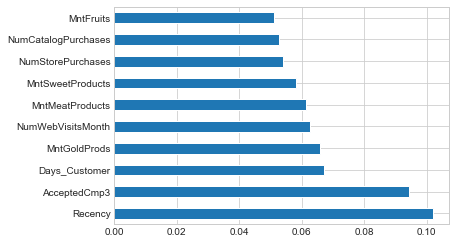

In [639]:
""" 

2.1 Feature Importance with Decision Tree Algorithm

WE can get the feature importance of each feature of your dataset
by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data,
the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, 
we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.


"""



"""
# Function that receives a dataframe, list of feature names, name of target and DecisionTreeClassifier paramethers and
# returns a dataframe with all features with a worth higher than zero and plots it.
"""


"""
Another algorithm
""" 
from sklearn.ensemble import ExtraTreesClassifier

data=df4

import pandas as pd
import numpy as np
X = data.drop(['Response',"ID", "Marital_Status", "Education"], axis=1) #independent columns
y = data['Response']    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()



In [ ]:

"another algorithm"
from sklearn.tree import DecisionTreeClassifier

def dta_feat_worth(df, feat_list, target, max_depth, min_samples_split, min_samples_leaf, random_state_value):
    
    # Preparing the Input Data for the DTA
    X = df.loc[:, feat_list].values  ##or df2
    y = df[target].values    ##or df2
    
    # Run the estimation through DecisionTreeClassifier
    dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=50, 
                                   min_samples_leaf = 20, random_state=random_state_value)
    # Fits the DTClassifier with our data
    dtree = dtree.fit(X, y)

    # Create a dictionary with the name of all features and its importances according to the DTA estimation
    fi = dict(zip(col_feat, dtree.feature_importances_))
    # Then creates a Dataframe with it
    fidf = pd.DataFrame(fi, index=["worth"])
    # Transpose it because the way it is created it is on the other orientation
    fidf_t = fidf.transpose().sort_values(by="worth", ascending=False)
     # Removes features with worth 0 and puts it into a df called worth_df
    worth_df = fidf_t[fidf_t.worth>0]

    # Uses seaborn to create a plot with the worth of features
    plt.style.use('seaborn-whitegrid')
    axes = worth_df.sort_values(by="worth").plot.barh(y='worth',  legend=False)
    axes.set_title("Worth of features")
    # Repositions legend
    plt.legend(loc='lower right')
    plt.show()
    
    return worth_df


In [640]:
# Getting a feature list without categorical variables, ID and Response=target)

col_feat = df4.columns
col_feat= col_feat.drop(["ID", "Response", "Marital_Status", "Education"])



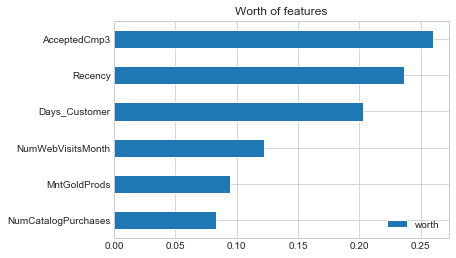

,worth
AcceptedCmp3,0.260106
Recency,0.236722
Days_Customer,0.203013
NumWebVisitsMonth,0.122271
MntGoldProds,0.094558
NumCatalogPurchases,0.083330


In [642]:
dta_feat_worth(df4, col_feat, 'Response', 10, 100, 10, 42)

In [565]:
# f, feat_list, target, max_depth, min_samples_split, min_samples_leaf, random_state_value

#dta_feat_worth(df4_2, col_feat, 'Response', 10, 100, 10, 42)

In [643]:
"""
2.2. Univariate Selection - Text Chi-squared: for both Categorical and Numerical data

Statistical tests can be used to select those features that have 
the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite
of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test 
for non-negative features to select 10 of the best features
""" 
data=df4

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#X = data.drop(['Response', "ID"], axis=1) #independent columns
X = data.drop(['Response',"ID", "Marital_Status", "Education"], axis=1) #independent columns
y = data['Response']    #target column i.e ositive responses for 6th campaign

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features



NameError: name 'fit' is not defined

In [645]:
"""
Another algorithm
B)  The  χ2  Independence Test¶
The  χ2  test for independence, despite having the null hypothesis of independence of variables, 
can also measure the degree of association between two variables,
which means we can use it to check which feature is similar to our Response variable.

In order to use as input of the test a numerical feature, the binning strategy with 10 bins was employed.

"""

# Parameters:
# dfIs given as input a dataframe, 
# a list of continuous features names, a list of categorical features names,
# the name of the target feature and returns a dataframe with the discrimination ability of each feature and if
# its p-value is lower than 0.05.
# 10 is the default number of bins and uniform is the strategy used in the binning of continuous features.

def chisq_ranker(dframe, continuous_flist, categorical_flist, target, n_bins=10, binning_strategy="uniform"):
    chisq_dict = {}
  
    if  continuous_flist:
        bindisc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', 
                               strategy=binning_strategy)
        for feature in continuous_flist:            
            feature_bin = bindisc.fit_transform(dframe[feature].values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=dframe.index)
            cont_tab = pd.crosstab(feature_bin, dframe[target], margins = False)
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2] 
    
    if  categorical_flist:
        for feature in categorical_flist:  
            cont_tab = pd.crosstab(dframe[feature], dframe[target], margins = False)          
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2]       
    
    df_chi = pd.DataFrame(chisq_dict, index=["Chi-Squared", "p-value"]).transpose()
    df_chi.sort_values("Chi-Squared", ascending=False, inplace=True)
    df_chi["valid"]=df_chi["p-value"]<=0.05
    
    
    return df_chi


In [646]:
feat_num

['Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Days_Customer']

In [648]:
cat_features
#cat_features.remove('NumberOff')


['Education',
 'Marital_Status',
 'Kidhome',
 'Teenhome',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Complain']

In [649]:
"""
We can now check the similarity of each feature with the Response, 
which, in turn, means we can check the discrimination ability of our features.
"""
chisq_ranker(df4, feat_num, cat_features, "Response")

,Chi-Squared,p-value,valid
AcceptedCmp3,90.772390,1.611869e-21,True
NumWebVisitsMonth,72.254886,5.492285e-12,True
MntGoldProds,66.400432,7.699379e-11,True
Recency,64.708748,1.643694e-10,True
NumStorePurchases,53.355907,1.539450e-11,True
Days_Customer,47.572692,3.069227e-07,True
NumCatalogPurchases,44.742801,1.924085e-10,True
MntFruits,35.583797,4.698596e-05,True
MntMeatProducts,32.558184,1.593864e-04,True
MntSweetProducts,32.419914,1.684369e-04,True


##### Conclusion:


According to both feature engineering techniques, the following variables seems to have more relevance for the model:

1a) ExtraTreesClassifier
        Recency
        AcceptedCmp3
        Days_Customer
        MntGoldProds
        NumWebVisitsMonth
        MntMeatProducts
        MntSweetProducts
        NumStorePurchases
        NumCatalogPurchases
        MntFruits
        
1b) DEcision tree classifier
    AcceptedCmp3
    Recency
    Days_Customer
    NumWebVisitsMonth
    MntGoldProds
    NumCatalogPurchases

2)Chi-squared:
    AcceptedCmp3
    NumWebVisitsMonth
    MntGoldProds
    Recency
    NumStorePurchases
    Days_Customer
    NumCatalogPurchases
    MntFruits
    MntMeatProducts
    MntSweetProducts
    NumWebPurchases

These items will be used in the next steps.



In [650]:
"""
Export preliminar dataset
""" 

df4.to_excel("ml_project1_data_df4.xlsx") 

###  Overview of categorical variables after data treatment

In [673]:
df4.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Customer
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,...,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,5593.716738,1971.457082,33978.402381,0.798283,0.463519,48.611588,34.830472,4.180258,18.908798,5.710300,...,3.094421,6.418455,0.064378,0.008584,0.001073,0.001073,0.002146,0.010730,0.087983,2441.109442
std,3235.832624,10.880134,11791.647351,0.490596,0.524133,29.038798,45.634202,6.180051,18.023473,7.111041,...,0.803918,1.610519,0.245556,0.092299,0.032756,0.032756,0.046299,0.103082,0.283422,197.227629
min,9.000000,1945.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2124.000000
25%,2736.000000,1965.000000,25434.750000,1.000000,0.000000,24.000000,7.000000,0.000000,7.000000,0.000000,...,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2262.000000
50%,5426.500000,1972.000000,33783.688773,1.000000,0.000000,48.500000,19.000000,2.000000,13.000000,3.000000,...,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2428.500000
75%,8372.250000,1979.000000,41647.500000,1.000000,1.000000,75.250000,43.000000,5.000000,23.000000,8.000000,...,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2602.250000
max,11191.000000,1996.000000,86580.000000,2.000000,2.000000,99.000000,532.000000,51.000000,129.000000,43.000000,...,5.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2821.000000


In [674]:
df4['Response'].groupby.sum()

AttributeError: 'function' object has no attribute 'sum'

### Overview of categorical variables after data treatment

In [652]:
def cat_count(df,i):
    res=df[[cat_features[i],'Response']].groupby([cat_features[i]]).agg({'Response' : ["count","sum"]})                                                                                                              
    prop= df[[cat_features[i],'Response']].groupby([cat_features[i]]).sum()  / df[[cat_features[i],'Response']].groupby([cat_features[i]]).count() 
    result = pd.concat([res, prop], axis=1,sort=False)
    result.columns = ['Nbr observations', 'Nbr Positive Responses (for 6th campaign)', 'Proportion positive responses from observations']                                                                                     
    return result


def cat_plot_count(df,i):
    x_cat=cat_features[i]
    order_df=list(df[cat_features[i]].unique())
    #order_dfpos=

    fig = plt.figure(figsize=(10,6))

    ax1 = fig.add_subplot(2,1,1) 
    sns.countplot(data = df, x = x_cat, ax = ax1, order=order_df)
    ax1.set_title('Number of observations of %s subclasses in datasetnswers' %x_cat)

    ax2 = fig.add_subplot(2,1,2) 
    sns.countplot(data = df_positive, x = x_cat, ax = ax2, order=order_df)
    ax2.set_title('Number of positive responses from category %s in observations' %x_cat)
    #plt.subplots_adjust(bottom=0.9, right=0.8, top=0.9)
    plt.subplots_adjust(hspace = 0.7)

In [656]:
i=0
cat_count(df4,i)


,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
Education,,,
2n Cycle,101,7,0.069307
Basic,48,2,0.041667
Graduation,453,37,0.081678
Master,151,19,0.125828
PhD,179,17,0.094972


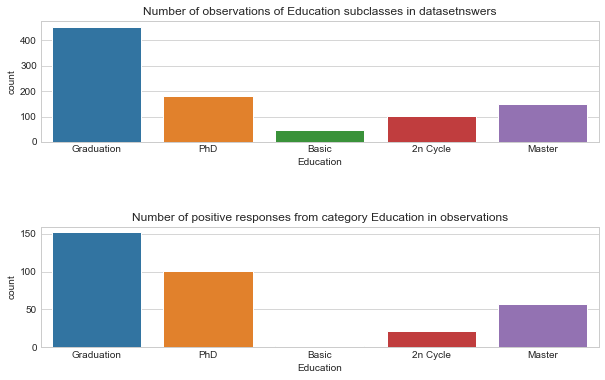

In [655]:
cat_plot_count(df4,i)

In [667]:
i=1
cat_count(df4,i)

,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
Marital_Status,,,
Divorced,92,10,0.108696
Married,368,24,0.065217
Single,211,29,0.137441
Together,239,16,0.066946
Widow,22,3,0.136364


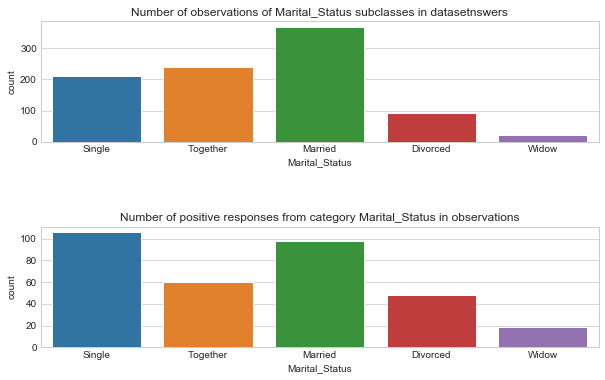

In [668]:
cat_plot_count(df4,i)

In [669]:
i=6
cat_count(df4,i)

,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
AcceptedCmp3,,,
0,872,56,0.064220
1,60,26,0.433333


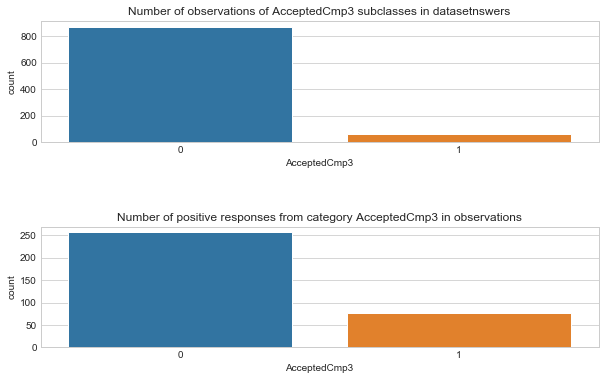

In [670]:
cat_plot_count(df4,i)

In [671]:
i=8
cat_count(df4,i)

,Nbr observations,Nbr Positive Responses (for 6th campaign),Proportion positive responses from observations
AcceptedCmp5,,,
0,931,82,0.088077
1,1,0,0.000000


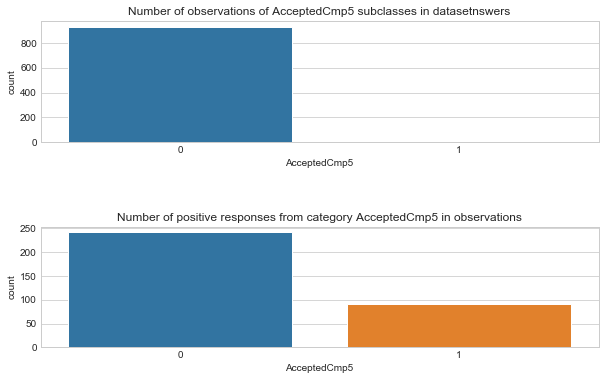

In [672]:
cat_plot_count(df4,i)